# Market Sentiment vs Bond Market
### Boris Chu
The following notebook attempts to find correlations between the market sentiment through the 
S&P 500 and the bond market through US Treasuries. Namely, the yield curve will be calculated to 
see how investors react to a common recession warning sign. 

In [33]:
# Libraries used 

# Data management packages
import quandl
import pandas as pd
from scipy import stats
import numpy as np
# Data vis packages
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting data from Quandl

quandl.ApiConfig.api_key = 'uCFQdzxqSqyvo59r1ypD'
sentiment = quandl.get('AAII/AAII_SENTIMENT')
treasuries = quandl.get('USTREASURY/YIELD')
print(sentiment.columns)
print(treasuries.columns)

Index(['Bullish', 'Neutral', 'Bearish', 'Total', 'Bullish 8-Week Mov Avg',
       'Bull-Bear Spread', 'Bullish Average', 'Bullish Average + St. Dev',
       'Bullish Average - St. Dev', 'S&P 500 Weekly High',
       'S&P 500 Weekly Low', 'S&P 500 Weekly Close'],
      dtype='object')
Index(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR',
       '10 YR', '20 YR', '30 YR'],
      dtype='object')


In [3]:
data = treasuries.join(sentiment)
data = data.dropna(subset=['Bearish', 'Bullish', 'Neutral'])
data.index = pd.to_datetime(data.index)
pd.plotting.register_matplotlib_converters()
data

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,...,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,...,0.300000,1.000000,0.328750,0.100000,0.384907,0.488293,0.281522,359.69,352.20,352.20
1990-01-12,NaN,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,...,0.170000,1.000000,0.355000,0.280000,0.384907,0.488293,0.281522,353.79,339.93,339.93
1990-01-19,NaN,NaN,8.00,8.01,8.00,8.20,8.23,8.20,8.24,8.26,...,0.200000,1.000000,0.360000,0.110000,0.384907,0.488293,0.281522,340.75,337.00,339.15
1990-01-26,NaN,NaN,7.93,8.04,8.07,8.28,8.38,8.38,8.45,8.49,...,0.380000,1.000000,0.355000,-0.140000,0.384907,0.488293,0.281522,331.61,325.80,325.80
1990-02-02,NaN,NaN,8.07,8.17,8.13,8.37,8.43,8.42,8.46,8.50,...,0.480000,1.000000,0.335000,-0.330000,0.384907,0.488293,0.281522,330.92,322.98,330.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-24,1.75,1.73,1.67,1.65,1.59,1.58,1.58,1.58,1.67,1.77,...,0.282723,1.000001,0.296727,0.073298,0.380788,0.481874,0.279702,3014.57,2976.31,3004.52
2019-10-31,1.59,1.59,1.54,1.57,1.53,1.52,1.52,1.51,1.60,1.69,...,0.284337,1.000000,0.303395,0.055422,0.380788,0.481874,0.279702,3050.10,2991.21,3046.77
2019-11-07,1.57,1.57,1.56,1.58,1.58,1.68,1.70,1.74,1.84,1.92,...,0.239295,1.000001,0.312366,0.163728,0.380788,0.481874,0.279702,3085.20,3023.19,3076.78


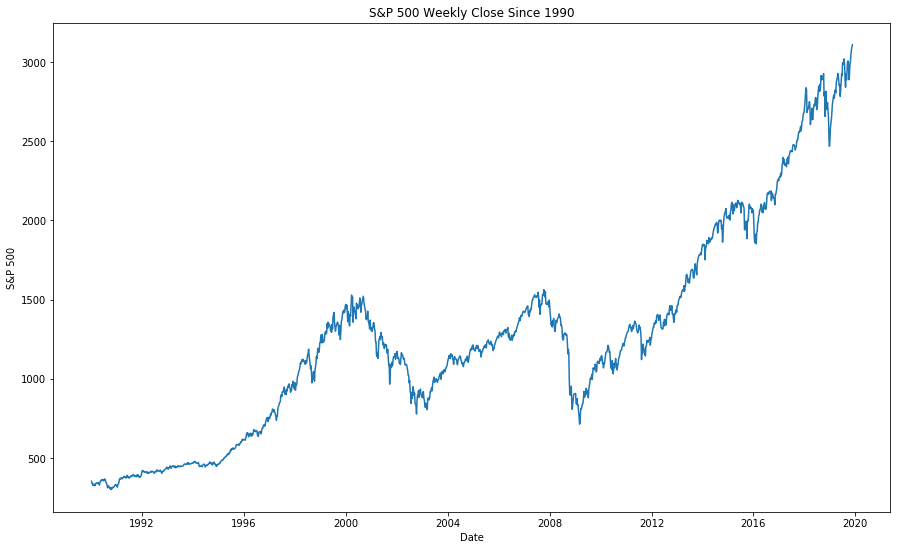

In [6]:
plt.plot(data['S&P 500 Weekly Close'])
plt.xlabel('Date')
plt.ylabel('S&P 500')
plt.title('S&P 500 Weekly Close Since 1990')
plt.rcParams['figure.figsize'] = [15, 9]
plt.show()


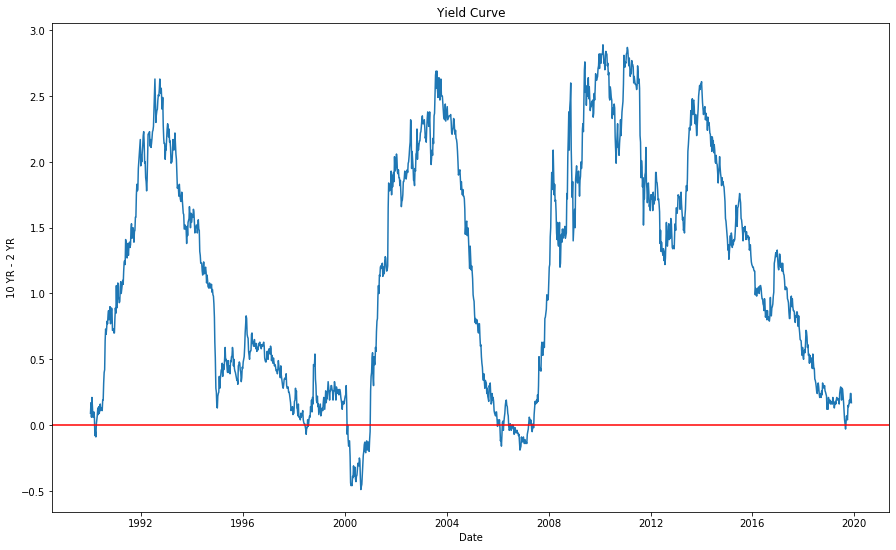

In [28]:
yield_curve = data['10 YR'] - data["2 YR"]
yield_curve = yield_curve.to_frame('10YR/2YR')
plt.plot(yield_curve)
plt.xlabel('Date')
plt.ylabel('10 YR - 2 YR')
plt.title('Yield Curve')
plt.rcParams['figure.figsize'] = [15, 9]
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

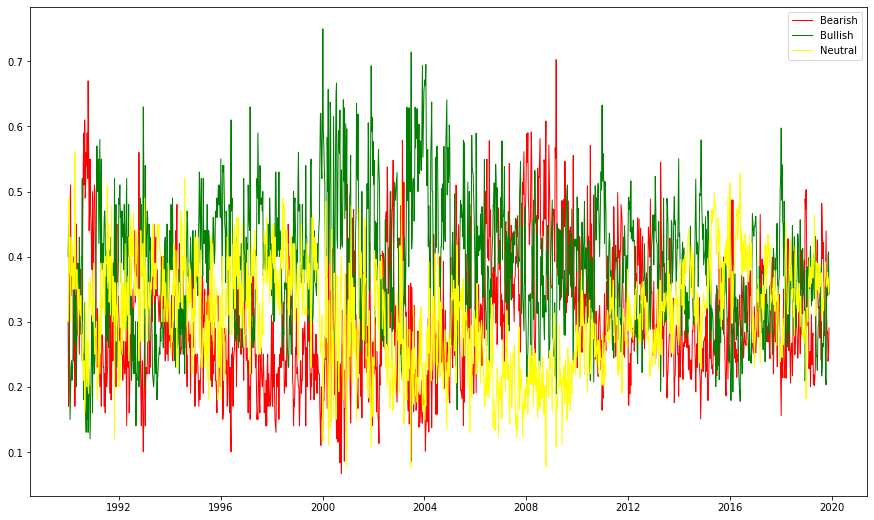

In [29]:
# Plot sentiment 

plt.plot(data['Bearish'], data=data, color='red', linewidth=1)
plt.plot(data['Bullish'], data=data, color='green', linewidth=1)
plt.plot(data['Neutral'], data=data, color='yellow', linewidth=1)
plt.legend()
plt.show()



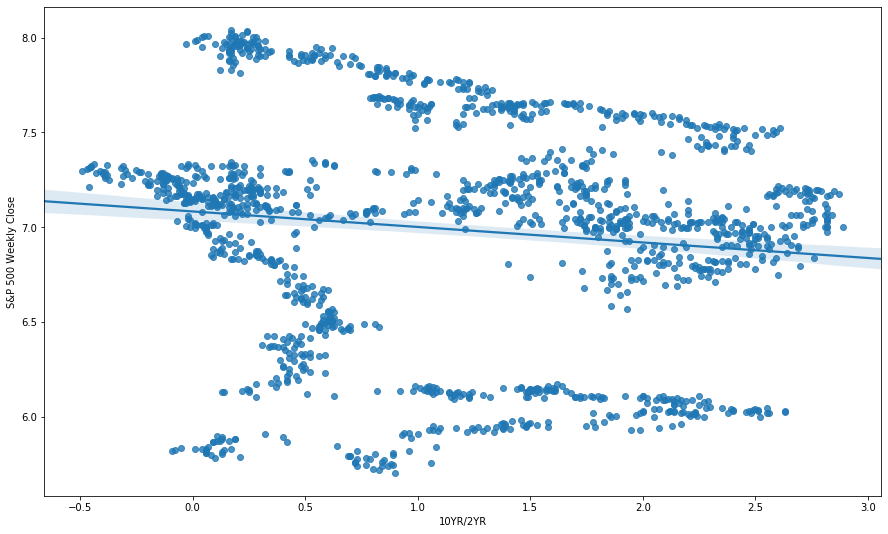

0.015635308882878004


In [43]:
# Plot S&P 500 vs 10 YR - 2 YR spread
# Transform S&P 500 to logrithmic scale
spy = np.log(data['S&P 500 Weekly Close'])
spy_yield_curve = pd.concat([yield_curve, spy], axis=1)
sns.regplot(x='10YR/2YR', y='S&P 500 Weekly Close', data=spy_yield_curve)
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(
    spy_yield_curve['10YR/2YR'],spy_yield_curve['S&P 500 Weekly Close'])
print(r_value**2)